<H1> Linear Regression Assignment </H1>
<H2> Case Study: Analyzing Factors Influencing Bike-Sharing Demand for BoomBikes </H2>
<H3> Problem Statement </H3>
<p> A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.  </p>

<H3> Business Goal </H3>
<p> You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.  </p>

<H1> Importing required libraires </H1>

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [5]:
# Ignoring warnings
import warnings
warnings.filterwarnings("ignore")

<H1> Reading and Understanding Data </H1>

In [6]:
data_df = pd.read_csv("day.csv")

In [7]:
data_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [8]:
data_df.shape

(730, 16)

In [9]:
data_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<H1> Data Cleaning </H1>

In [10]:
# Check for null values
round(100*(data_df.isnull().sum()/len(data_df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [11]:
# Dropping duplicates
data_df.drop_duplicates(inplace = True)

In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<h3> Details about the dataset </h3>
<ul>
    <li><b> No Missing Values </b></li>
    <li><b> No Duplicate Values </b></li>
    <li><b> Number of rows 730 </b></li>
    <li><b> Number of columns 16  </b></li>
</ul>

In [13]:
# Checking for Junk values
for col in data_df:
    print(data_df[col].value_counts(), '\n')

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64 

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 

yr
0    365
1    365
Name: count, dtype: int64 

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 

holiday
0    709
1     21
Name: count, dtype: int64 

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 

workingday
1    499
0    231
Name: count, dtype: int64 

weathersit
1    463
2    246
3     21
Name: count, dtype: int64 

temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
           

<h3> Insights from value_counts </h3>
<ul>
    <li><b> No junk Values </b></li>
</ul>

In [14]:
data_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

<h3> Significance of each column </h3>
<ul>
<li><b> 'instant' - record index. </b></li>
<li><b> 'dteday' - Date of the record (format: DD-MM-YYYY). </b></li>
<li><b> 'season' - Season of the year (1:spring, 2:summer, 3:fall, 4:winter). </b></li>
<li><b> 'yr' - Year indicator (0: 2018, 1: 2019). </b></li>
<li><b> 'mnth' - Month of the year (1 to 12). </b></li>
<li><b> 'holiday' - Whether the day is a public holiday or not (0: No, 1: Yes). </b></li>
<li><b> 'weekday' - Day of the week. </b></li>
<li><b> 'workingday' - Whether it is a working day (0: No, 1: Yes, excluding weekends and holidays). </b></li>
<li>
    <b> 'weathersit' - Weather situation. </b>
    <ul>
        <li> Clear, Few clouds, Partly cloudy, Partly cloudy</li>
        <li> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist</li>
		<li> Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds</li>
		<li> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog</li>
    </ul>
</li>
<li><b> 'temp' - temperature in Celsius. </b></li>
<li><b> 'atemp' - feeling temperature in Celsius. </b></li>
<li><b> 'hum' - humidity. </b></li>
<li><b> 'windspeed' - wind speed. </b></li>
<li><b> 'casual' - Number of non-registered (casual) users. </b></li>
<li><b> 'registered' - Number of registered users. </b></li>
<li><b> 'cnt' - Total bike rentals (sum of casual and registered users). </b></li>
</ul>

In [15]:
# Dropping insignificant columns
# instant - indexing column
# dteday - Has columns 'yr' and 'mnth' which makes column 'dteday' redundant
# casual - Ignoring this column as we had total bikes booked count
# registered - Ignoring this column as we had total bikes booked count
data_df = data_df.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [16]:
data_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [17]:
data_df.shape

(730, 12)

<ul>
    <li><b> We had 12 columns after dropping columns 'instant', 'dteday', 'casual', 'registered' </b></li>
</ul>

In [18]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [19]:
# convert to categorical variable
data_df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace = True)
data_df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'}, inplace = True)

data_df.mnth = data_df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
data_df.weekday = data_df.weekday.replace({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'})

data_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,good,9.305237,11.46350,43.6957,12.522300,1600


In [20]:
data_df.season.value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [21]:
data_df.mnth.value_counts()

mnth
jan     62
mar     62
may     62
jul     62
aug     62
oct     62
dec     62
apr     60
jun     60
sept    60
nov     60
feb     56
Name: count, dtype: int64

In [22]:
data_df.weekday.value_counts()

weekday
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: count, dtype: int64

In [23]:
data_df.weathersit.value_counts()

weathersit
good        463
moderate    246
bad          21
Name: count, dtype: int64

In [24]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


<H1> EDA </H1>

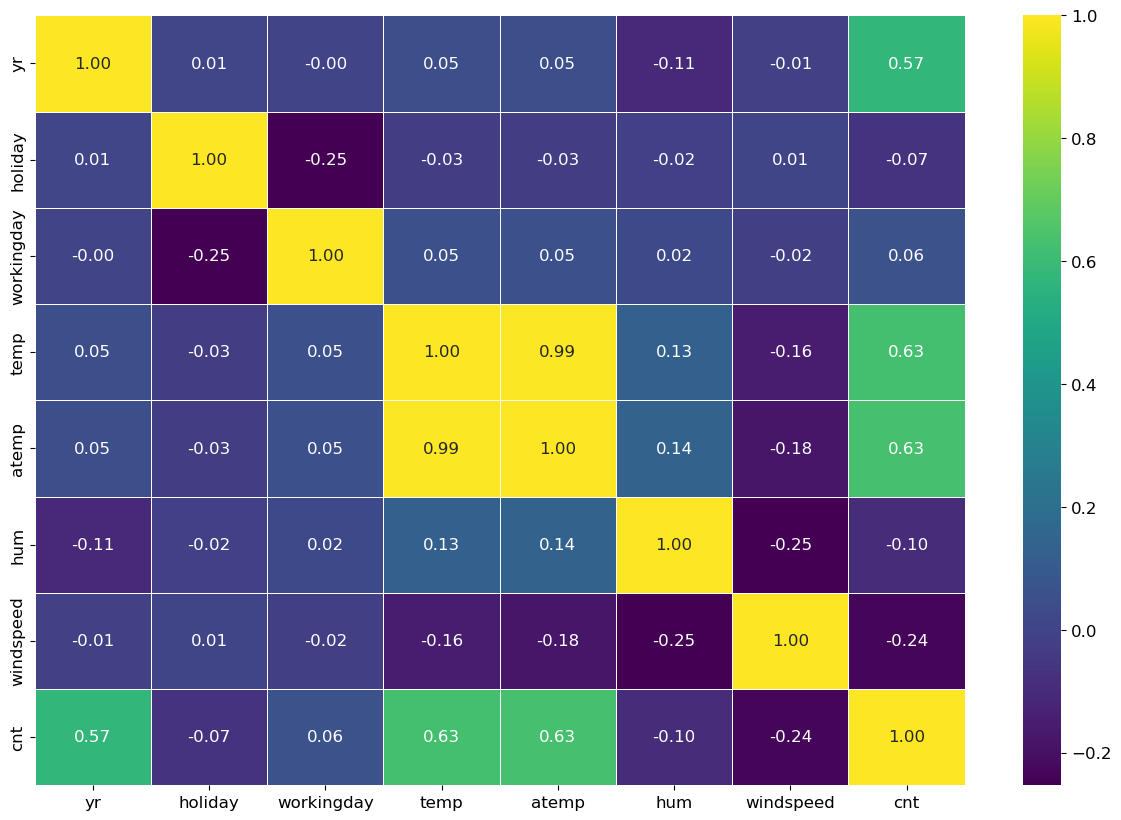

In [25]:
# Correlation between continuous(Numerical) variables
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 12})

sns.heatmap(data_df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt']].corr(),cmap="viridis",annot=True, fmt=".2f", linewidths=.5)

plt.show()

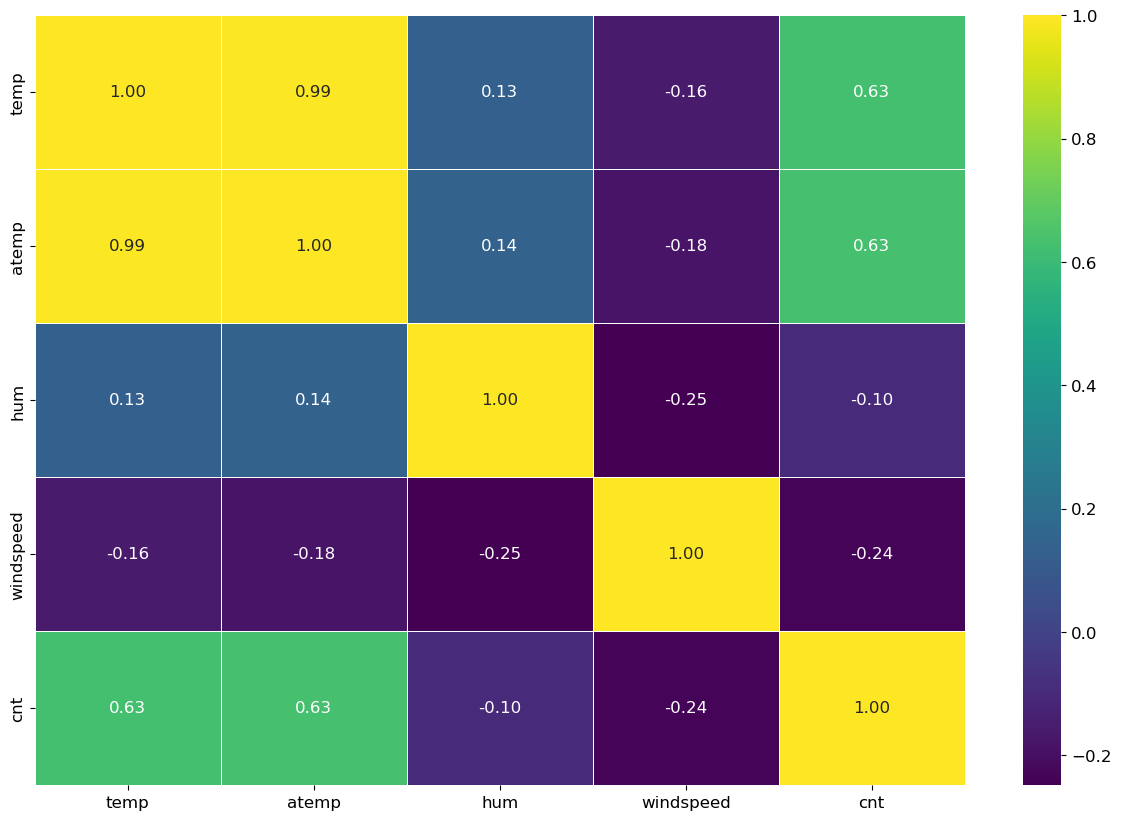

In [26]:
plt.figure(figsize=(15,10))
plt.rcParams.update({'font.size': 12})

sns.heatmap(data_df[['temp','atemp','hum','windspeed','cnt']].corr(),cmap="viridis",annot=True, fmt=".2f", linewidths=.5)

plt.show()

<h3> Insights </h3>
<ul>
    <li><b> Temp and atemp have a very high correlation (~0.99) </b></li>
    <li><b> Temp and cnt show a strong positive correlation (~0.63) </b></li>
    <li><b> hum and windspeed have a weak negative correlation with cnt </b></li>
</ul>

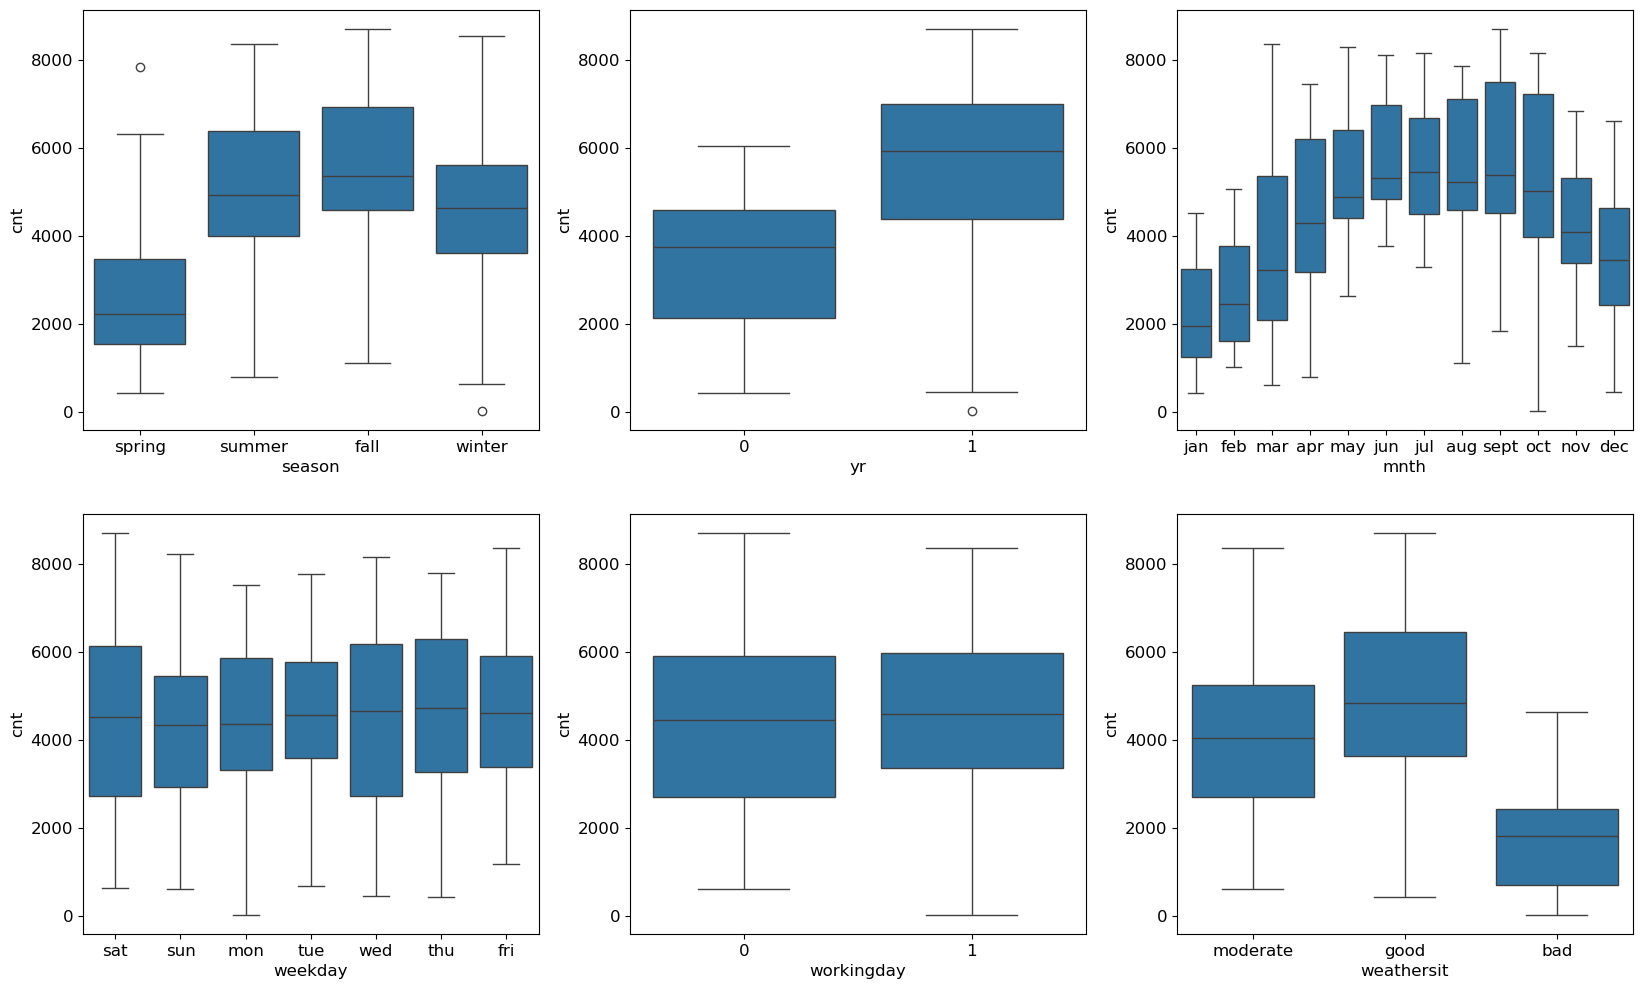

In [27]:
# Categorical variables vs cnt
plt.figure(figsize=(20,12))

plt.subplot(2,3,1)
sns.boxplot(x='season',y='cnt',data=data_df)

plt.subplot(2,3,2)
sns.boxplot(x='yr',y='cnt',data=data_df)

plt.subplot(2,3,3)
sns.boxplot(x='mnth',y='cnt',data=data_df)

plt.subplot(2,3,4)
sns.boxplot(x='weekday',y='cnt',data=data_df)

plt.subplot(2,3,5)
sns.boxplot(x='workingday',y='cnt',data=data_df)

plt.subplot(2,3,6)
sns.boxplot(x='weathersit',y='cnt',data=data_df)

plt.show()

<h3> Insights </h3>
<ul>
    <li><b> season: Bike rentals are highest in fall and summer, while spring sees the lowest rentals. </b></li>
    <li><b> yr: The 2019 has significantly higher rentals than 2018 </b></li>
    <li><b> mnth: Rentals increase from March to September and then start declining towards December. </b></li>
    <li><b> weekday: No significant difference is observed between weekdays and weekends. </b></li>
    <li><b> Weathersit: Rentals are highest on clear days and lowest during light snow or rainy days. </b></li>
</ul>

<h3> Observations </h3>
<ul>
    <li><b> Temperature is one of the strongest factors influencing bike rentals. </b></li>
    <li><b> Weather conditions such as clear skies positively affect rentals, while bad weather reduces demand. </b></li>
    <li><b> There is a clear upward trend in rentals over the years. </b></li>
    <li><b> Monthly patterns show that rentals peak in summer and drop during winter. </b></li>
</ul>

<H1> Linear regression </H1>
<H2> Data preparation </H2>

In [28]:
# Creating dummies
data_df = pd.get_dummies(data = data_df, columns = ["season", "mnth", "weekday"], drop_first = True)
data_df = pd.get_dummies(data = data_df, columns = ["weathersit"])

In [29]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   yr                   730 non-null    int64  
 1   holiday              730 non-null    int64  
 2   workingday           730 non-null    int64  
 3   temp                 730 non-null    float64
 4   atemp                730 non-null    float64
 5   hum                  730 non-null    float64
 6   windspeed            730 non-null    float64
 7   cnt                  730 non-null    int64  
 8   season_spring        730 non-null    bool   
 9   season_summer        730 non-null    bool   
 10  season_winter        730 non-null    bool   
 11  mnth_aug             730 non-null    bool   
 12  mnth_dec             730 non-null    bool   
 13  mnth_feb             730 non-null    bool   
 14  mnth_jan             730 non-null    bool   
 15  mnth_jul             730 non-null    boo

In [30]:
data_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [31]:
data_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,True,False,True,False


In [32]:
data_df.shape

(730, 31)

<H3> Splitting the data set into Train & Test with 70:30 ratio </H3>

In [33]:
# Target variable
y=data_df.pop('cnt')

X_train, X_test, y_train, y_test = train_test_split(data_df, y, test_size=0.3, random_state=42)

In [34]:
data_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,14.902598,17.68695,69.6087,16.652113,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,8.050924,9.47025,43.7273,16.636703,True,False,False,...,False,True,False,False,False,False,False,False,True,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [35]:
X_train.shape

(511, 30)

In [36]:
X_test.shape

(219, 30)

<H3> Scaling continuous variables </H3>

In [37]:
scaler = MinMaxScaler()

#Fit and transform training set only
cont_vars = ['temp','atemp','hum','windspeed']
X_train[cont_vars] = scaler.fit_transform(X_train[cont_vars])

In [38]:
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_bad,weathersit_good,weathersit_moderate
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,True,False,False,False,False,False,False,True,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,False,False,True,False,False,True


<H3> Building linear model </H3>

In [40]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [42]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 4),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 9),
 ('season_winter', True, 1),
 ('mnth_aug', False, 14),
 ('mnth_dec', False, 2),
 ('mnth_feb', False, 8),
 ('mnth_jan', False, 15),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 11),
 ('mnth_mar', False, 5),
 ('mnth_may', False, 6),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 7),
 ('mnth_sept', False, 3),
 ('weekday_mon', False, 10),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 13),
 ('weekday_tue', False, 16),
 ('weekday_wed', False, 12),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [43]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_jul', 'mnth_nov', 'weekday_sat',
       'weekday_sun', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [44]:
X_train.columns[~rfe.support_]

Index(['temp', 'season_summer', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [45]:
X_train_rfe = X_train[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']]

In [46]:
X_train_rfe.shape

(511, 15)

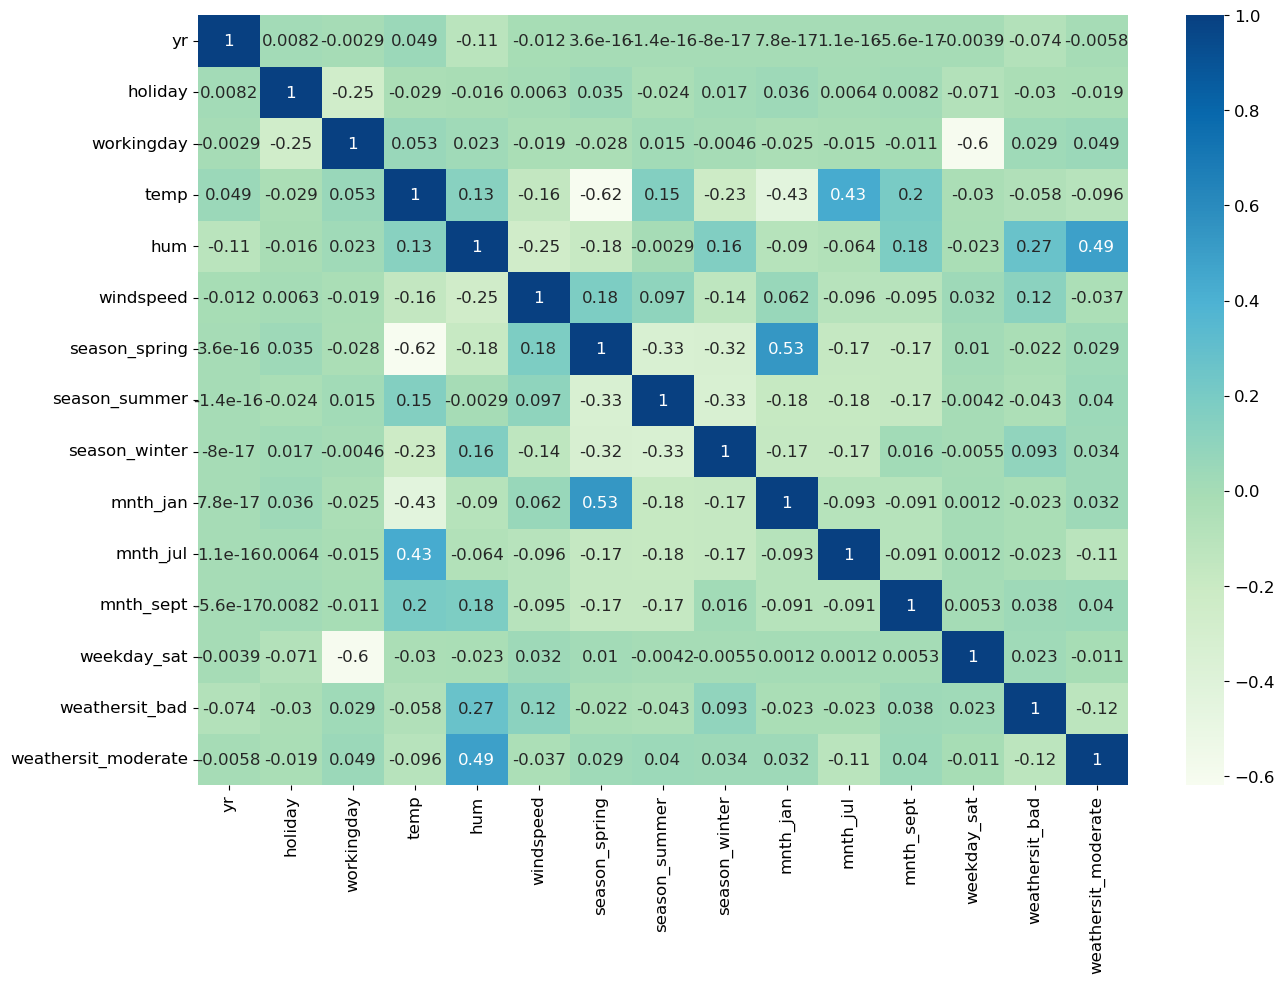

In [47]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(data_df[['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']].corr(), cmap='GnBu', annot=True)
plt.show()

In [48]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    # Add a constant
    X_train_sm = sm.add_constant(X_train[cols].astype(float))
    
    # Create a first fitted model
    lm = sm.OLS(y_train, X_train_sm).fit()
    
    print(lm.summary())
    return lm

In [49]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

<H2> Training models </H2>
<H3> Model-1 </H3>

In [50]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.52e-183
Time:                        22:47:57   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2373.1199    

<H3> Model-2 </H3>
<ul>
    <li><b> mnth_jan has negative coefficient and high p-value, so dropping mnth_jan </b></li>
</ul>

In [51]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          3.59e-184
Time:                        22:47:57   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2357.7484    

<H3> Model-3 </H3>
<ul>
    <li><b> hum has high VIF, so dropping hum </b></li>
</ul>

In [52]:
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.46e-181
Time:                        22:47:57   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1524.3398    

<H3> Model-4 </H3>
<ul>
    <li><b> holiday has negative coefficient and high p-value, so dropping holiday </b></li>
</ul>

In [53]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          4.56e-182
Time:                        22:47:57   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1458.3161    

<H3> Model-5 </H3>
<ul>
    <li><b> mnth_jul has negative coefficient and high p-value, so dropping mnth_jul </b></li>
</ul>

In [54]:
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sept', 'weekday_sat',
       'weathersit_bad', 'weathersit_moderate']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          1.57e-182
Time:                        22:47:57   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1392.1476    

<H3> Model-6 </H3>
<ul>
    <li><b> Replacing mnth_jul with season_spring as both were highly correlated </b></li>
    <li><b> Removing of working_day,Summer and adding temp </b></li>
</ul>

In [55]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']
build_model(cols6)
get_vif(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          2.33e-179
Time:                        22:47:58   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

<h3> Insights </h3>
<ul>
    <li><b> VIF seems to be almost accepted </b></li>
    <li><b> p-value for all the features is almost 0.0 and R2 is 0.82 </b></li>
</ul>

<H3> Finalize this model to use further </H3>

In [56]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [57]:
cols = ['yr', 'season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols6],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436207 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


<H2> Model Evaluation </H2>
<H3> Residucal Analysis </H3>

In [58]:
y_train_pred = lr.predict(X_train[cols])

Text(0.5, 0, 'Errors')

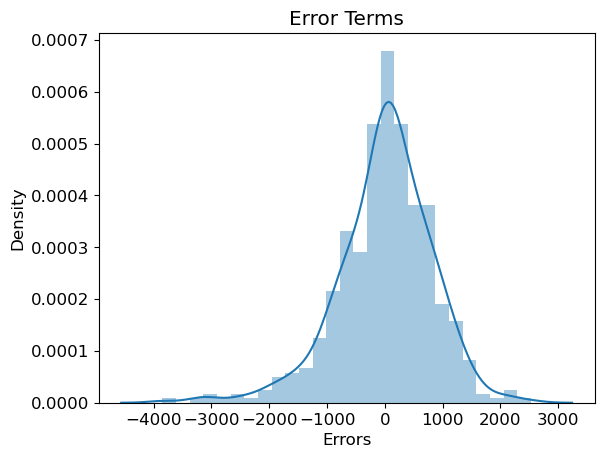

In [59]:
#Plot a histogram of the error terms
sns.distplot(y_train-y_train_pred)
plt.title('Error Terms')
plt.xlabel('Errors')

<h3> Insights </h3>
<ul>
    <li><b> Errors are normally distribured here with mean 0. </b></li>
</ul>

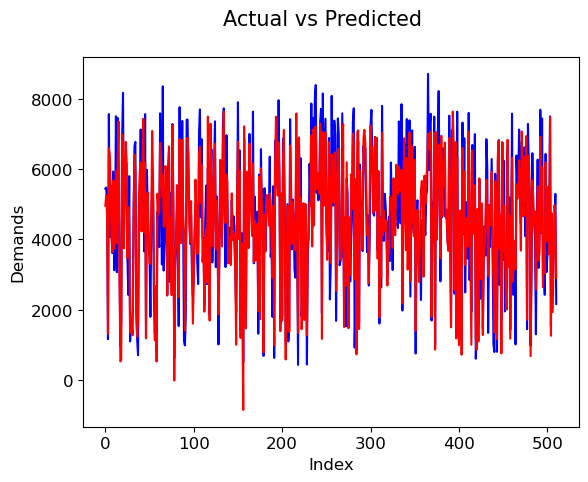

In [60]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

<h3> Insights </h3>
<ul>
    <li><b> Residuals are normally distributed, So linear Regression is valid. </b></li>
</ul>

<H2> Model Predictions </H2>
<H3> R-Squared value for train predictions </H3>

In [61]:
r2_score(y_train,y_train_pred)

0.8185359364498817

<H2> Prediction of values on test dataset </H2>

In [62]:
cont_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[cont_vars] = scaler.transform(X_test[cont_vars])

In [63]:
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

#Predicting test data values
y_test_pred = lr.predict(X_test[cols6])

<H3> R-Squared value for test predictions </H3>

In [64]:
r2_score(y_test,y_test_pred)

0.8159036088393239

<H2> Evaluating the model </H2>

In [65]:
#evaluating the model based on r2_score(as mentioned in the problem statement as well)
y_pred = y_test_pred
r2_score(y_test, y_pred)

0.8159036088393239

Text(0, 0.5, 'y_pred')

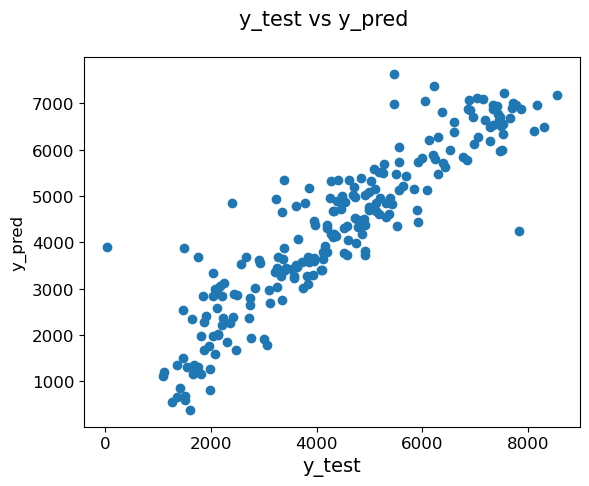

In [66]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 15)             
plt.xlabel('y_test', fontsize = 14)                          
plt.ylabel('y_pred', fontsize = 12) 

In [67]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols6 = ['yr','season_spring', 'mnth_jul',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_bad', 'weathersit_moderate','temp']

lm = build_model(cols6)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 05 Mar 2025   Prob (F-statistic):          2.33e-179
Time:                        22:47:58   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1849.3111    

<h3> The analysis identifies key variables significantly impacting the demand for shared bikes. These variables serve as strong predictors to forecast bike rentals: </h3>
<ul>
    <li><b> holiday:</b> Demand tends to fluctuate on holidays. </li>
    <li><b> temp:</b> Higher temperatures generally lead to increased bike rentals. </li>
    <li><b> hum:</b> High humidity levels negatively affect demand. </li>
    <li><b> windspeed:</b> Strong winds tend to lower bike usage. </li>
    <li><b> season:</b> Different seasons drive varying demand patterns, with summer and fall showing higher rentals. </li>
    <li><b> Mnth:</b> Specific months — January, July, September, November, and December — show distinct rental trends. </li>
    <li><b> yr:</b> Rentals increased in 2019 compared to the previous year, indicating growing adoption. </li>
    <li><b> weekday:</b> Sundays see lower demand compared to weekdays. </li>
    <li><b> weathersit:</b> Adverse weather conditions like Light Snow or Mist with Cloudy Skies result in fewer bike rentals. </li>
</ul>